## ПРАКТИЧНА РОБОТА 4

### Варіант 15

##### Частина 1

###### Завдання 1: Завантажте файл Housing.csv. Виведіть перші 5 рядків. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Housing .csv")

print(data.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


###### Завдання 2: Зробіть новий датасет, який містить тільки ці стовпчики. 
columns = ['price', 'area', 'bedrooms', 'bathrooms'] 

In [3]:
new_data = data.copy()
columns = ['price', 'area', 'bedrooms', 'bathrooms'] 
new_data = new_data[columns]

print(new_data)

        price  area  bedrooms  bathrooms
0    13300000  7420         4          2
1    12250000  8960         4          4
2    12250000  9960         3          2
3    12215000  7500         4          2
4    11410000  7420         4          1
..        ...   ...       ...        ...
540   1820000  3000         2          1
541   1767150  2400         3          1
542   1750000  3620         2          1
543   1750000  2910         3          1
544   1750000  3850         3          1

[545 rows x 4 columns]


###### Завдання 3: Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних. 
Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком. 

In [4]:
print("Форма даних: ", new_data.shape)
new_data.describe()

Форма даних:  (545, 4)


,price,area,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


In [5]:
data_clean = new_data.replace(to_replace = "—", value = np.NaN)
print("Оновлена таблиця: \n", data_clean)

Оновлена таблиця: 
         price  area  bedrooms  bathrooms
0    13300000  7420         4          2
1    12250000  8960         4          4
2    12250000  9960         3          2
3    12215000  7500         4          2
4    11410000  7420         4          1
..        ...   ...       ...        ...
540   1820000  3000         2          1
541   1767150  2400         3          1
542   1750000  3620         2          1
543   1750000  2910         3          1
544   1750000  3850         3          1

[545 rows x 4 columns]


In [6]:
print("Тип даних: \n", data_clean.dtypes)

Тип даних: 
 price        int64
area         int64
bedrooms     int64
bathrooms    int64
dtype: object


In [7]:
missing_sum = data_clean.isnull().sum()

print("Сума пропусків в кожній колонці: ")
print(missing_sum)

Сума пропусків в кожній колонці: 
price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64


###### Завдання 4: Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1. 

In [8]:
for col in columns[1:]:
    data_clean[col] = (data_clean[col] - data_clean[col].mean()) / data_clean[col].std()
    
print(data_clean.head())

      price      area  bedrooms  bathrooms
0  13300000  1.045766  1.402131   1.420507
1  12250000  1.755397  1.402131   5.400847
2  12250000  2.216196  0.047235   1.420507
3  12215000  1.082630  1.402131   1.420507
4  11410000  1.045766  1.402131  -0.569663


###### Завдання 5: Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

In [9]:
X = data_clean[['area', 'bedrooms', 'bathrooms']].values
y = data_clean[['price']].values

###### Завдання 6: Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print(X_train)
print(y_train)

[[-0.70527273 -1.30766139 -0.56966336]
 [-0.5301689  -1.30766139 -0.56966336]
 [-0.97253647 -1.30766139 -0.56966336]
 ...
 [ 0.2762303   0.04723492  1.42050672]
 [-0.71448872  0.04723492 -0.56966336]
 [ 0.66790992  0.04723492 -0.56966336]]
[[ 1750000]
 [ 2695000]
 [ 2870000]
 [ 2590000]
 [ 4515000]
 [ 4410000]
 [ 4585000]
 [ 5250000]
 [ 3570000]
 [ 3640000]
 [ 9800000]
 [ 2940000]
 [ 6083000]
 [ 3255000]
 [ 4893000]
 [ 3150000]
 [ 2975000]
 [ 6930000]
 [ 3500000]
 [ 5880000]
 [ 3500000]
 [ 4235000]
 [ 3710000]
 [ 4060000]
 [ 2345000]
 [ 4550000]
 [10150000]
 [ 3640000]
 [ 2660000]
 [ 2233000]
 [ 2135000]
 [ 4277000]
 [ 6230000]
 [ 6300000]
 [ 3920000]
 [ 7350000]
 [ 8400000]
 [ 5215000]
 [ 7420000]
 [ 6230000]
 [ 4900000]
 [ 4550000]
 [ 4060000]
 [ 3010000]
 [ 7343000]
 [ 5600000]
 [ 7140000]
 [10150000]
 [ 9870000]
 [ 3780000]
 [ 2940000]
 [ 2653000]
 [ 3836000]
 [ 4760000]
 [ 7962500]
 [ 3143000]
 [ 3500000]
 [ 4690000]
 [ 4340000]
 [ 4515000]
 [ 1767150]
 [ 3080000]
 [ 5950000]
 [ 5

###### Завдання 7: Побудуйте модель лінійної регресії та навчіть її на навчальних даних. 

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###### Завдання 8: Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації. ППотім застосуйте  крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією). 

In [12]:
y_pred = model.predict(X_test)
modelquality = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(modelquality)
r2 = r2_score(y_test, y_pred)
print("Середньоквадратична помилка (RMSE) : ", rmse)
print("Середній коефіцієнт детермінації без крос-валідації: ", r2)

cv_scores = cross_val_score(model, X_train, y_train, cv = 5)
print("Середній коефіцієнт детермінації з крос-валідацією: ", np.mean(cv_scores))

print("Отже, середній коефіцієнт детермінації без крос-валідації на ", r2 - np.mean(cv_scores), " більший за середній коефіцієнт детермінації з крос-валідацією")

Середньоквадратична помилка (RMSE) :  1227134.3451505206
Середній коефіцієнт детермінації без крос-валідації:  0.4774078759267767
Середній коефіцієнт детермінації з крос-валідацією:  0.4638681704050418
Отже, середній коефіцієнт детермінації без крос-валідації на  0.01353970552173489  більший за середній коефіцієнт детермінації з крос-валідацією


###### Завдання 9: Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних. 

In [13]:
pred = model.predict(X_test)

print("Прогнозовані ціни на будинки: \n", pred)

Прогнозовані ціни на будинки: 
 [[ 3949389.22619793]
 [ 6149057.11813487]
 [ 4212599.32744967]
 [ 7075702.95842909]
 [ 4290879.32360401]
 [ 6284439.12672419]
 [ 3890679.22908218]
 [ 3745861.23619665]
 [ 3283819.94471289]
 [ 7796215.16663763]
 [ 6622015.22432254]
 [ 3933733.22696707]
 [ 3734119.2367735 ]
 [ 4755673.18658763]
 [ 4726318.18802975]
 [ 3334891.25638637]
 [ 3827083.11802401]
 [ 4740017.18735676]
 [ 3597129.24350341]
 [ 3670523.12571533]
 [ 6988959.09211324]
 [ 6323579.12480136]
 [ 4340789.20696963]
 [ 3049169.27042303]
 [ 4896577.17966544]
 [ 5031959.18825476]
 [ 5123589.16851302]
 [ 4606941.19389438]
 [ 6505929.13108328]
 [ 4896577.17966544]
 [ 3631383.12763816]
 [ 3274224.25936676]
 [ 5671549.1415934 ]
 [ 3490479.13456035]
 [ 3604957.24311884]
 [ 4429839.08841242]
 [ 5206755.27860978]
 [ 3572079.64473402]
 [ 2784987.0550366 ]
 [ 3235084.26128959]
 [ 7125949.08538333]
 [ 6582875.22624537]
 [ 6069169.13729975]
 [ 4534532.19745162]
 [ 3761517.23542752]
 [ 6147449.13345409]
 [

##### Частина 2

###### Завдання 10: Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії. 

In [14]:
X_train_analytical = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
coeff_analytical = np.linalg.inv(X_train_analytical.T.dot(X_train_analytical)).dot(X_train_analytical.T).dot(y_train)
intercept_analytical = coeff_analytical[0]
coeffs_analytical = coeff_analytical[1:]

print("Аналітичні коефіцієнти: ")
print("Intercept (зміщення) аналітичне рішення: ", intercept_analytical.round(3))
print("Коефіцієнти для атрибутів : Площа = ", coeffs_analytical[0], ", Кількість спалень = ", coeffs_analytical[1], ",Кількість ванних кімнат= ", coeffs_analytical[2])

Аналітичні коефіцієнти: 
Intercept (зміщення) аналітичне рішення:  [4788268.486]
Коефіцієнти для атрибутів : Площа =  [849393.15448181] , Кількість спалень =  [350260.08112131] ,Кількість ванних кімнат=  [711125.12153779]


##### Частина 3

###### Завдання 11: Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю. 

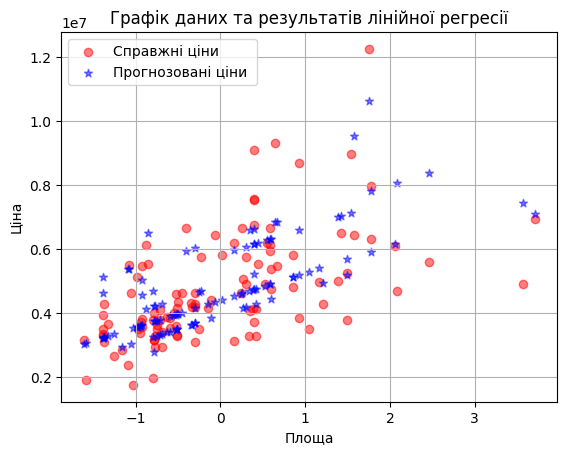

In [15]:
plt.scatter(X_test[:, 0], y_test, label = "Справжні ціни", color='red', marker='o', alpha = 0.5)
plt.scatter(X_test[:, 0], y_pred, label = "Прогнозовані ціни ", color='blue' , marker='*', alpha = 0.5)
plt.xlabel("Площа")
plt.ylabel("Ціна")
plt.title("Графік даних та результатів лінійної регресії")
plt.legend()
plt.grid(True)
plt.show()

###### Завдання 12: Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони. 

In [16]:
diff = model.coef_[0] - coeffs_analytical

print("Oтримані параметри (коефіцієнти) лінійної регресії: ", model.coef_[0])
print("Аналітичні коефіцієнти: ", coeffs_analytical)
print("Різниця по коефіцієнтам становить:", diff)

Oтримані параметри (коефіцієнти) лінійної регресії:  [849393.15448181 350260.08112131 711125.12153779]
Аналітичні коефіцієнти:  [[849393.15448181]
 [350260.08112131]
 [711125.12153779]]
Різниця по коефіцієнтам становить: [[ 2.32830644e-10 -4.99133073e+05 -1.38268033e+05]
 [ 4.99133073e+05 -2.32830644e-10  3.60865040e+05]
 [ 1.38268033e+05 -3.60865040e+05  4.65661287e-10]]


###### Завдання 13: Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.

Після порівняння коефіцієнтів лінійної регресії, отриманих за допомогою навчання моделі та завдяки аналітичним обчисленням, ми помітили дуже малу різницю між ними, яка складається з дуже малих чисел, що близькі до нуля. Це свідчить про те, що модель лінійної регресії, навчена на цьому наборі даних, вдало відображає співвідношення між вхідними атрибутами (площа, кількість спалень, кількість ванних кімнат) і вихідною змінною (ціна на будинок). Отже, можна зробити висновок, що лінійна регресія є ефективним методом для прогнозування цін на будинок на основі цих атрибутів.

###### Висновок: На практичній роботі, я навчилася застосовувати на практиці лінійну регресію, для більш точного прогнозування цін. Також зрозуміла, як правильно аналізувати та нормалізувати дані. Також я навчилася будувати, навчати та оцінювати модель лінійної регресії.